<a href="https://colab.research.google.com/github/pedrotrillost/Data-Analysis-projects/blob/main/Class_5_Group_1__Trading_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#        FI505E - Coding and Data Science for Finance           
#####                                        Autumn 2022 
######                                      Stocks Trading 
 
Group Project :                                            
##  Use Machine Learning Techniques to trade stocks 

In this lab exercise, we work on the problem of predicting a buy or sell signal for a trading strategy in the classification framework. The predicted variable has a value of 1 for buy and 0 for sell. The buy or sell signal are decided on the basis on the comparison of short term vs. long term price.

### Please submit your solution to this lab excercise.

The goal of this case study is tu use classification based models to predict whether the current signal is **buy or sell** depending on the short term vs long term price.


For this task, you need to pick a stock symbole in the market,accourding to your group number, and forecast to forecast stock prcie. 


##Students name 	  Student No.	      
#### 1. Manon Castanet ETU20191666
#### 2. Keqing Luo ETU20192187
#### 3. Yuehua Zhong ETU20210286
#### 4. Pedro José Trillos Toro ETU20220847
#### 5. Aline Rivera Mata ETU20220727

##Class: 5
##Group: 1

##To hand in
###Guidelines for report layout
 
Select a symbol accourding to your group number for this link

https://bit.ly/2IK70kN

 Report your results with Python code in this nootbook file. Please explain the result in details. Reporting codes and graphs without explainations is not enough.
•	You need to explain results and graphs, just graphs cannot be considered as grading
•	Name your report: ClassNo_GroupNo, upload word format file to Turnitin on Moodle.
•	The assignment counts for 10% of the module grade.
•	The Rennes School of Business policy is to not give grades for continuous assessment during the term, so you will only receive your grade when you get the overall module grade.

#Deadline for reporting is 26.11.2022.

##Grading

The project will be graded from zero to 100, and a minimum of 55 points are required to pass the project. Higher scores will yield higher grades. The clarity and quality of motivations and comments play an important role in the grading.

##Plagiarism Warning 
Plagiarism is defined as direct copying of textual material of other people’s work, and presenting them as one’s own without acknowledgement.
No student shall represent the work of another person as his own in any academic assignment.
Plagiarism is a very serious offence. There are clear university rules as well as severe penalties for plagiarism at Rennes School of Business. 

Plagiarism Declaration

We, Manon, Keqing, Yuehua, Pedro, and Aline, hereby declare that we created this piece of work by ourselves, only with the sources stated above and without further aid. We consent to a plagiarism check of this work by conventional and electronic means (digitalization and automatized check by software). 


--------------------------------------                                     -------------------------
Place, Rennes, France date     26/11/2022                                                                 




## Content

<a id='0'></a>
# 1. Problem Definition

The problem of predicting a buy or sell signal for a trading strategy is defined in the
classification framework, where the predicted variable has a value of 1 for buy and 0
for sell.

The buy or sell signal are decided on the basis on the comparison of short term vs. long
term price.



<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1.2'></a>
## 2.2. Loading the Data

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [ ]:

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose



import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

In [ ]:
# Select Symbol from the list according to your group.
MyTicker = yf.Ticker("DTE")

In [ ]:
for x in MyTicker.info:
    print (x,MyTicker.info[x])

zip 48226-1279
sector Utilities
fullTimeEmployees 10400
longBusinessSummary DTE Energy Company engages in the utility operations. The company's Electric segment generates, purchases, distributes, and sells electricity to approximately 2.3 million residential, commercial, and industrial customers in southeastern Michigan. It generates electricity through fossil-fuel, hydroelectric pumped storage, and nuclear plants, as well as wind and other renewable assets. This segment owns and operates approximately 698 distribution substations and 449,800 line transformers. The company's Gas segment purchases, stores, transports, distributes, and sells natural gas to approximately 1.3 million residential, commercial, and industrial customers throughout Michigan; and sells storage and transportation capacity. This segment has approximately 20,000 miles of distribution mains; 1,304,000 service pipelines; and 1,305,000 active meters, as well as owns approximately 2,000 miles of transmission pipelines.

#Question 1
### Write about stock, you can get stock information from yahoo
### More options: https://github.com/ranaroussi/yfinance
A brief description of DTE is provided on the company website (https://newlook.dteenergy.com/wps/wcm/connect/dte-web/home/about-dte/common/about-dte/about-dte): "DTE Energy (NYSE: DTE) is a Detroit-based diversified energy company involved in the development and management of energy-related businesses and services nationwide." (DTE Energy, 2022)

Currently, DTE Company Energy’s stock is  $114.49. The last dividend date is 16 December 2022 and the dividend yield is 3.35%. The market capitalization of DTE Energy Company, which is the total value of shares outstanding, is 22,182 B.
The beta coefficient, the volatility coefficient, is 0.60. It is therefore lower than the average given that the reference index is 1. The information about the stock tells us DTE is a financially healthy and profitable company.


In [ ]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

            Open       High        Low      Close     Volume  Dividends  Stock Splits
count  15332.000  15332.000  15332.000  15332.000  1.533e+04  15332.000     1.533e+04
mean      18.528     18.746     18.434     18.598  5.612e+05      0.007     2.071e-04
std       29.252     29.447     28.954     29.209  9.174e+05      0.057     1.873e-02
min        0.000      0.238      0.230      0.230  0.000e+00      0.000     0.000e+00
25%        0.609      0.620      0.613      0.617  2.667e+04      0.000     0.000e+00
50%        6.072      6.119      6.022      6.080  2.922e+05      0.000     0.000e+00
75%       19.485     19.690     19.320     19.482  8.897e+05      0.000     0.000e+00
max      137.063    138.246    136.471    137.151  4.418e+07      0.923     2.000e+00


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
1962-01-02 00:00:00-05:00,0.0,0.440,0.436,0.436,1880,0.0,0.0,1962-01-02 00:00:00-05:00
1962-01-03 00:00:00-05:00,0.0,0.436,0.432,0.432,5170,0.0,0.0,1962-01-03 00:00:00-05:00
1962-01-04 00:00:00-05:00,0.0,0.435,0.429,0.429,7755,0.0,0.0,1962-01-04 00:00:00-05:00
1962-01-05 00:00:00-05:00,0.0,0.428,0.420,0.420,10575,0.0,0.0,1962-01-05 00:00:00-05:00
1962-01-08 00:00:00-05:00,0.0,0.421,0.416,0.421,6815,0.0,0.0,1962-01-08 00:00:00-05:00


<a id='2'></a>
# 3. Exploratory Data Analysis

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

# Using Plotly we will see how is the stock looks like.
# Plot time series the close price and volume of stock price
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of DTE Energy Co.1962-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of DTE",xaxis_title="Date", yaxis_title="Volume")
fig.show()


# Question 2
###Explain the time series plots and try to identify important events

The first graph shows the evolution of closing share prices from 1962 to 2022.

The prices were around 0.5 USD in the early 70s and 80s and reached  4.40 USD in the 1990s. 

It is noticeable that the price has increased at a stable rate since 1998 to reach 114 USD today. The share has been subject to some slight fluctuations, but there is a noticeable drop in March of 2020 when the share lowered its price to 60 USD after having been 104 USD the month before.This was arguably due to the Covid health and economic crisis that deeply affected all sectors of the worldwide economy. There is also a significant drop in the price in October of 2022 when it got reduced to 103 USD after having been 135 USD in September. We could assume this is due to the tensing of the relationships between the United States and Russia (one of the main world suppliers of energy inputs) during this period of time.

The second graph above shows the evolution of the DTE Company share volume from 1970 to 2022.

Volume is the number of shares bought and sold over a defined period. In our case, the volume is expressed quantity of shares by month, as each bar corresponds to a different month, so we have the number of shares bought and sold per month. Volume is a rather interesting indicator as it represents investor interest in a stock. We can see that in December of 1987, DTE Company reached its highest volume. In the mid-1990s and up to now, the volume of DTE Company has averaged between 4 and 7M.


<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [ ]:
# peek at data
set_option('display.width', 100)
data.tail(5)

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,114.60,114.50,116.50,114.39,2300300
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,113.00,114.89,114.89,112.00,2967300
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,113.67,113.68,114.90,113.10,1425500
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,114.49,112.83,114.53,112.66,966000
2022-11-25 00:00:00-05:00,2022-11-25 00:00:00-05:00,114.78,114.91,115.42,114.60,387000


In [ ]:
# describe data
set_option('precision', 3)
data.describe()

,Close,Open,High,Low,Volume
count,15332.000,15332.000,15332.000,15332.000,1.533e+04
mean,18.598,18.528,18.746,18.434,5.612e+05
std,29.209,29.252,29.447,28.954,9.174e+05
min,0.230,0.000,0.238,0.230,0.000e+00
25%,0.617,0.609,0.620,0.613,2.667e+04
50%,6.080,6.072,6.119,6.022,2.922e+05
75%,19.482,19.485,19.690,19.320,8.897e+05
max,137.151,137.063,138.246,136.471,4.418e+07


# Question 3
### Explain the statistical description of data and provide a simple summary about the data sample

Statistical description is used to view, describe and summarize the data from a study or analysis. In our case, we have 15332 time periods (observations) for which we have Close, Open, High, Low, and Volume information of DTE stock. The two most important variables here are Close (stock price at the end of the trading day) and Volume (number of shares traded in a specific time period), but really, what we are interested in and what will serve us to make our predictions is the close price. On average, close price is $18.60. However this measure is not robust to outliers which means it is highly influenced by extremely low or high values such as the minimim of 0.230 USD or the maximum of 137.15 USD. The median is a better way to find a center value since it is robust to outliers. The standard deviation, which measures the volatility of the stock, is 29.21 USD. The variation here is very high.

<a id='3'></a>
# 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning

In [ ]:
#Checking for any null values and removing the null values
print('Null Values =',data.isnull().values.any())

Null Values = False


The outcome is that we do not have any null values in our dataset.

In [ ]:
#dataset[dataset.columns.values] = dataset[dataset.columns.values].ffill()
#dataset=dataset.drop(columns=['Timestamp'])

<a id='3.2'></a>
## 4.2. Preparing the data for classification

We attach a label to each movement: 
* **1** if the signal is that short term price will go up as compared to the long term. 
* **0** if the signal is that short term price will go down as compared to the long term.

In [ ]:
# Initialize the `signals` DataFrame with the `signal` column
#datas['PriceMove'] = 0.0
# Create short simple moving average over the short window
data['short_mavg'] = data['Close'].rolling(window=10, min_periods=1, center=False).mean()
# Create long simple moving average over the long window
data['long_mavg'] = data['Close'].rolling(window=100, min_periods=1, center=False).mean()


In [ ]:
fig=go.Figure(data=[go.Scatter(name = 'short_mavg',x= data['Date'],y= data['short_mavg'])])
fig.add_scatter(name = 'long_mavg',x=data['Date'], y=data['long_mavg'], mode='lines')
fig.update_layout(title="long_mavg and short_mavg",xaxis_title="Date", yaxis_title="mavg")
fig.show()

In this graph we see the evolution of the short term (blue line) and long term (red line) moving averages of DTE's closing prices over the years. We see that they are very similar to each other over time. Investors use moving averages to easily identify trends in a market or a stock by smoothing the fluctuations. They are able provide a visual representation of a stock's long-term trend. In this case we see that the trend is going upward. To investors and traders, when the short term moving average is greater than the long term moving average, it means that they should buy more of the stock and when it is less it means that they should sell their stock.

https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp

In [ ]:
# Create signals
data['signal'] = np.where(data['short_mavg'] > data['long_mavg'], 1.0, 0.0)

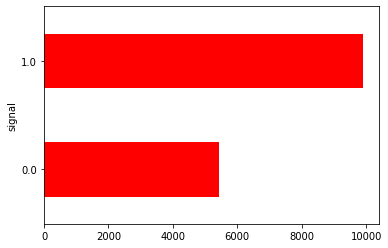

In [ ]:
fig = plt.figure()
plot = data.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

We find in our dataset that there are more indications to buy DTE stock than to sell it which means that it is a profitable investment most of the time.

In [ ]:
data.tail()

,Date,Close,Open,High,Low,Volume,short_mavg,long_mavg,signal
Date,,,,,,,,,
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,114.60,114.50,116.50,114.39,2300300,113.304,122.232,0.0
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,113.00,114.89,114.89,112.00,2967300,113.537,122.103,0.0
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,113.67,113.68,114.90,113.10,1425500,113.779,121.957,0.0
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,114.49,112.83,114.53,112.66,966000,114.151,121.868,0.0
2022-11-25 00:00:00-05:00,2022-11-25 00:00:00-05:00,114.78,114.91,115.42,114.60,387000,114.075,121.763,0.0


Here we see for example the estimated signal of the last 5 observations, which in these cases is to sell because long_mavg > short_mavg in all of them.

<a id='3.3'></a>
## 4.3. Feature Engineering

We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and Volume. Using this data we calculate the following  technical indicators:
* **Moving Average** : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart. 
* **Stochastic Oscillator %K and %D** : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
* **Relative Strength Index(RSI)** :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 
* **Rate Of Change(ROC)**: It is a momentum oscillator, which measures the percentage change between the current price and the n period past price. 
* **Momentum (MOM)** : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.

#### Detais of momentum indicators
Using this data, we calculate the following momentum indicators:

### Moving average
A moving average provides an indication of a price trend by cutting down the
amount of noise in the series.

### Stochastic oscillator %K
A stochastic oscillator is a momentum indicator that compares the closing price
of a security to a range of its previous prices over a certain period of time. %K and %D are slow and fast indicators. The fast indicator is more sensitive than the slow indicator to changes in the price of the underlying security and will likely result in many transaction signals.

###  Relative strength index (RSI)
This is a momentum indicator that measures the magnitude of recent price
changes to evaluate overbought or oversold conditions in the price of a stock or
other asset. The RSI ranges from 0 to 100. An asset is deemed to be overbought
once the RSI approaches 70, meaning that the asset may be getting overvalued
and is a good candidate for a pullback. Likewise, if the RSI approaches 30, it is an indication that the asset may be getting oversold and is therefore likely to become undervalued.

###  Rate of change (ROC)
This is a momentum oscillator that measures the percentage change between the
current price and the n period past prices. Assets with higher ROC values are
considered more likely to be overbought; those with lower ROC, more likely to
be oversold.

In [ ]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC


#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)

#calculation of stochastic osillator.
def STOK(close, low, high, n): 
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

In [ ]:
data['EMA10'] = EMA(data, 10)
data['EMA30'] = EMA(data, 30)
data['EMA200'] = EMA(data, 200)
data['ROC10'] = ROC(data['Close'], 10)
data['ROC30'] = ROC(data['Close'], 30)
data['MOM10'] = MOM(data['Close'], 10)
data['MOM30'] = MOM(data['Close'], 30)
data['RSI10'] = RSI(data['Close'], 10)
data['RSI30'] = RSI(data['Close'], 30)
data['RSI200'] = RSI(data['Close'], 200)
data['%K10'] = STOK(data['Close'], data['Low'], data['High'], 10)
data['%D10'] = STOD(data['Close'], data['Low'], data['High'], 10)
data['%K30'] = STOK(data['Close'], data['Low'], data['High'], 30)
data['%D30'] = STOD(data['Close'], data['Low'], data['High'], 30)
data['%K200'] = STOK(data['Close'], data['Low'], data['High'], 200)
data['%D200'] = STOD(data['Close'], data['Low'], data['High'], 200)
data['MA21'] = MA(data, 10)
data['MA63'] = MA(data, 30)
data['MA252'] = MA(data, 200)

In [ ]:
data.tail(5)

,Date,Close,Open,High,Low,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,114.60,114.50,116.50,114.39,2300300,113.304,122.232,0.0,113.476,113.394,120.476,3.551,7.747,2.21,7.11,56.419,48.019,49.503,72.283,68.891,87.250,85.625,37.122,36.431,113.304,110.242,124.038
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,113.00,114.89,114.89,112.00,2967300,113.537,122.103,0.0,113.390,113.368,120.402,1.573,6.303,2.33,6.64,50.496,46.418,49.183,40.620,55.569,77.250,81.083,32.867,34.498,113.537,110.464,124.015
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,113.67,113.68,114.90,113.10,1425500,113.779,121.957,0.0,113.441,113.388,120.335,2.618,10.349,2.42,7.37,52.801,47.181,49.321,51.550,54.817,81.437,81.979,34.649,34.879,113.779,110.709,123.998
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,114.49,112.83,114.53,112.66,966000,114.151,121.868,0.0,113.631,113.459,120.277,-0.909,7.492,3.72,11.48,55.613,48.116,49.490,59.125,50.432,86.562,81.750,36.829,34.782,114.151,111.092,123.983
2022-11-25 00:00:00-05:00,2022-11-25 00:00:00-05:00,114.78,114.91,115.42,114.60,387000,114.075,121.763,0.0,113.840,113.544,120.222,0.455,9.837,-0.76,8.27,56.628,48.450,49.549,59.914,56.863,85.637,84.546,37.601,36.360,114.075,111.368,123.967


In [ ]:
#excluding columns that are not needed for our prediction.

dataset=data.drop(['High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

In [ ]:
dataset = dataset.dropna(axis=0)

In [ ]:
dataset.tail()

,Date,Close,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,114.60,0.0,113.476,113.394,120.476,3.551,7.747,2.21,7.11,56.419,48.019,49.503,72.283,68.891,87.250,85.625,37.122,36.431,113.304,110.242,124.038
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,113.00,0.0,113.390,113.368,120.402,1.573,6.303,2.33,6.64,50.496,46.418,49.183,40.620,55.569,77.250,81.083,32.867,34.498,113.537,110.464,124.015
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,113.67,0.0,113.441,113.388,120.335,2.618,10.349,2.42,7.37,52.801,47.181,49.321,51.550,54.817,81.437,81.979,34.649,34.879,113.779,110.709,123.998
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,114.49,0.0,113.631,113.459,120.277,-0.909,7.492,3.72,11.48,55.613,48.116,49.490,59.125,50.432,86.562,81.750,36.829,34.782,114.151,111.092,123.983
2022-11-25 00:00:00-05:00,2022-11-25 00:00:00-05:00,114.78,0.0,113.840,113.544,120.222,0.455,9.837,-0.76,8.27,56.628,48.450,49.549,59.914,56.863,85.637,84.546,37.601,36.360,114.075,111.368,123.967


This is the tail of our dataset with the predictors and the variable of interest having excluded the variables that will not be used for prediction.

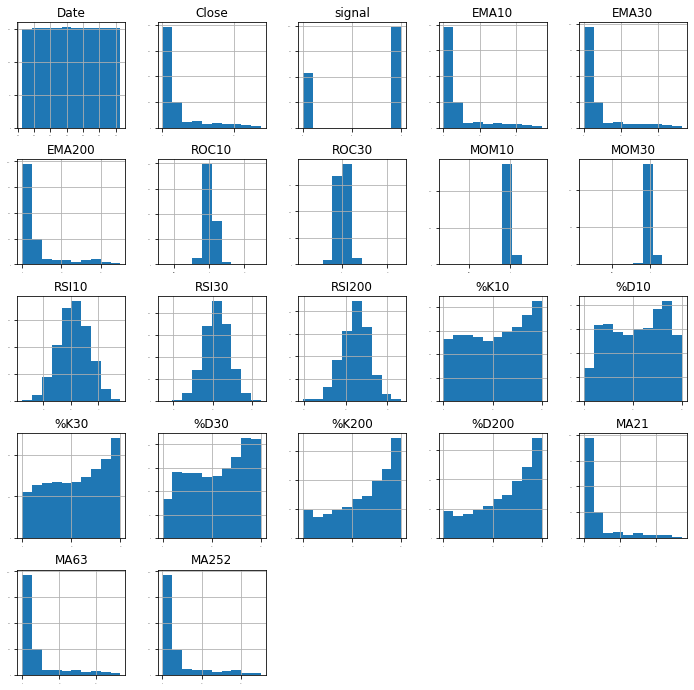

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

We now have a dataset with the variables that will be used to predict whether to buy or sell is the right action.

With the histogram of 'signal' we can identify that around 2/3 of our observations have buy signals while the other 1/3 has sell signals. This can be an indicator that, most of the time, DTE company is financially healthy and profitable.

We can also observe from the histograms that most of the predictors follow (skewed and with kurtosis) normal distributions.

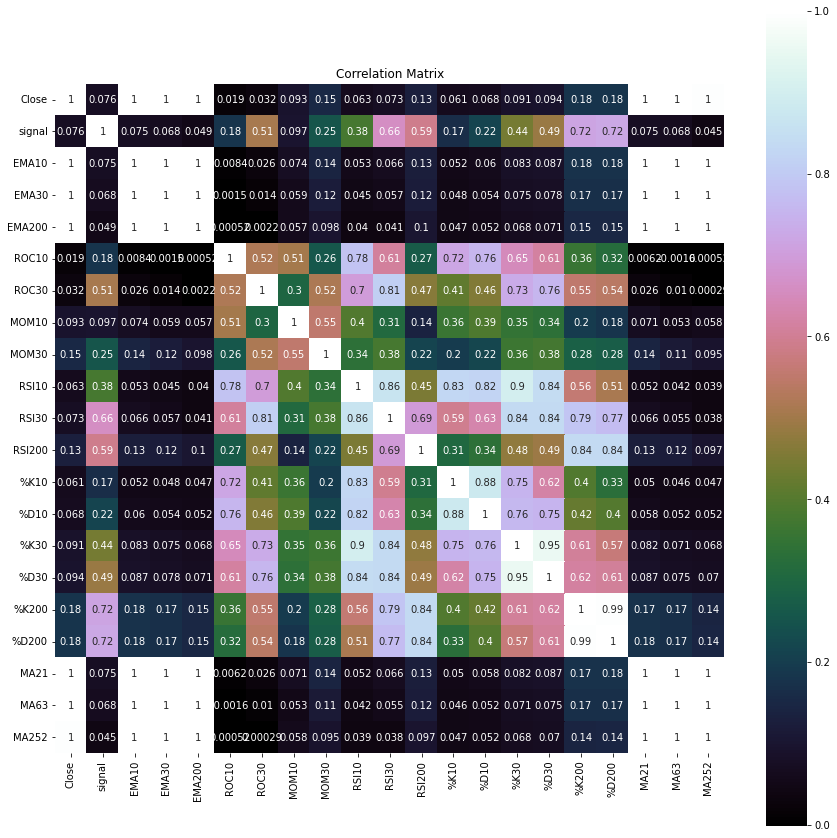

In [ ]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

This heatmap shows us how correlated are our predictors, and the signal among each other. The darker the color, the less correlation they have and vice versa. We see that a vast quantity of variables have a correlation of around 0.4 or higher, but this is expected since a number of predictors are variations of one another like %D10 and %D30, for example, or RSI10, RSI30, and RSI200.

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

We now must split the data into 2; one part for testing and one part for training. In this case, as we have time-series data, this process cannot be performed randomly.

In [ ]:
# run this function to split dataset. 

def Split_Train_Test(data, test_ratio):
    '''splits data into a training and testing set'''
    train_set_size = 1 - int(len(data) * test_ratio)
    train_set = data[:train_set_size]
    test_set = data[train_set_size:]
    return train_set, test_set

In [ ]:
dataset_foranalysis=dataset.drop(['Date'], axis=1)
# use above function to split data to (30%-70%). 
train, test = Split_Train_Test(dataset_foranalysis, 0.3)

In [ ]:
lags = range(1, 5)  # Just two lags for demonstration.

train_XX=train.loc[:, train.columns != 'signal']
train_XXlag=train_XX.assign(**{
  f'{col} (t-{lag})': train_XX[col].shift(lag)
  for lag in lags
  for col in train_XX
  })
Y_train = train["signal"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows
train_XXlag.drop(train_XXlag.head(5).index,inplace=True) # drop last n rows


test_XX=test.loc[:, test.columns != 'signal']
test_XXlag=test_XX.assign(**{
  f'{col} (t-{lag})': test_XX[col].shift(lag)
  for lag in lags
  for col in test_XX
  })

Y_test = test["signal"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows
test_XXlag.drop(test_XXlag.head(5).index,inplace=True) # drop last n rows


# Question 4
###Explain how this function split financial data set. Why we cannot split financial time seires to train and test randomly?    

First we split the data into train and test by formula, in this method we are creating a shuffled indices array for the length of the dataset. This is done so that the data does not represent patterns when sorted by specific features. 

We then get the length of the test data size. We use these variables to get the indexes of the training and test data, and return the test and training datasets.

We cannot split financial time series to train and test randomly because our observations are not independent and therefore we cannot split the data randomly as we would in a non-time series analysis.


In [ ]:
train_XX=train.loc[:, train.columns != 'signal']
X_train=pd.concat([train_XX.shift(1),train_XX.shift(2),train_XX.shift(3),train_XX.shift(4),train_XX.shift(5)], axis=1).dropna()

Y_train = train["signal"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows

#####################
### test
test_XX=test.loc[:, test.columns != 'signal']
#X_test=pd.concat([test.shift(1)], axis=1).dropna()
X_test=pd.concat([test_XX.shift(1),test_XX.shift(2),test_XX.shift(3),test_XX.shift(4),test_XX.shift(5)], axis=1).dropna()

Y_test = test["signal"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows

In [ ]:
test_XXlag.head(2)

,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252,Close (t-1),EMA10 (t-1),EMA30 (t-1),EMA200 (t-1),ROC10 (t-1),ROC30 (t-1),MOM10 (t-1),MOM30 (t-1),RSI10 (t-1),RSI30 (t-1),RSI200 (t-1),%K10 (t-1),%D10 (t-1),%K30 (t-1),%D30 (t-1),%K200 (t-1),%D200 (t-1),MA21 (t-1),MA63 (t-1),MA252 (t-1),Close (t-2),EMA10 (t-2),EMA30 (t-2),EMA200 (t-2),ROC10 (t-2),ROC30 (t-2),MOM10 (t-2),MOM30 (t-2),RSI10 (t-2),RSI30 (t-2),RSI200 (t-2),%K10 (t-2),%D10 (t-2),%K30 (t-2),%D30 (t-2),%K200 (t-2),%D200 (t-2),MA21 (t-2),MA63 (t-2),MA252 (t-2),Close (t-3),EMA10 (t-3),EMA30 (t-3),EMA200 (t-3),ROC10 (t-3),ROC30 (t-3),MOM10 (t-3),MOM30 (t-3),RSI10 (t-3),RSI30 (t-3),RSI200 (t-3),%K10 (t-3),%D10 (t-3),%K30 (t-3),%D30 (t-3),%K200 (t-3),%D200 (t-3),MA21 (t-3),MA63 (t-3),MA252 (t-3),Close (t-4),EMA10 (t-4),EMA30 (t-4),EMA200 (t-4),ROC10 (t-4),ROC30 (t-4),MOM10 (t-4),MOM30 (t-4),RSI10 (t-4),RSI30 (t-4),RSI200 (t-4),%K10 (t-4),%D10 (t-4),%K30 (t-4),%D30 (t-4),%K200 (t-4),%D200 (t-4),MA21 (t-4),MA63 (t-4),MA252 (t-4)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-11-24 00:00:00-05:00,18.525,18.219,17.831,16.537,2.866,7.845,0.623,1.388,68.837,63.908,55.214,87.560,78.107,93.580,89.340,96.962,95.228,18.246,17.726,16.442,18.308,18.151,17.783,16.517,2.265,6.836,0.475,0.905,63.408,61.836,54.812,81.819,70.185,91.573,85.581,96.282,93.735,18.183,17.680,16.428,18.181,18.116,17.747,16.499,1.952,4.472,0.180,0.938,59.713,60.556,54.574,64.943,73.347,82.865,86.330,92.441,94.109,18.136,17.65,16.415,18.172,18.102,17.717,16.482,0.956,5.392,0.381,0.876,59.475,60.474,54.559,63.793,77.127,82.303,86.423,92.481,94.272,18.118,17.619,16.401,18.340,18.086,17.686,16.465,3.085,6.038,0.160,1.155,66.737,63.094,54.937,91.304,83.348,93.820,88.294,97.407,95.159,18.080,17.589,16.385
2004-11-26 00:00:00-05:00,18.553,18.280,17.878,16.557,1.297,7.524,0.545,1.376,69.501,64.173,55.267,90.156,86.512,95.309,93.488,97.780,97.008,18.300,17.772,16.457,18.525,18.219,17.831,16.537,2.866,7.845,0.623,1.388,68.837,63.908,55.214,87.560,78.107,93.580,89.340,96.962,95.228,18.246,17.726,16.442,18.308,18.151,17.783,16.517,2.265,6.836,0.475,0.905,63.408,61.836,54.812,81.819,70.185,91.573,85.581,96.282,93.735,18.183,17.68,16.428,18.181,18.116,17.747,16.499,1.952,4.472,0.180,0.938,59.713,60.556,54.574,64.943,73.347,82.865,86.330,92.441,94.109,18.136,17.650,16.415,18.172,18.102,17.717,16.482,0.956,5.392,0.381,0.876,59.475,60.474,54.559,63.793,77.127,82.303,86.423,92.481,94.272,18.118,17.619,16.401


# Question 5
###Explain why we should use lag variables. How many lag variables might be enough? 
When a lagged variable is used in a model, this represents a kind of proxy for auto-correlation in the response variable, and the remaining explanatory variables are then included to see if there is any remaining statistical relationship between these variables and the response, after the effect of auto-correlation are removed. Too many lag variables will lead to the loss of the degrees of freedom, also miss specification errors. So we recommend not have many lag variables. Between 2 and 5 should be enough.

<a id='4.3'></a>
## 7. Compare Models

### Support Vector Machine Model

In [ ]:
#Create an SVR model now and train it.
from sklearn.svm import SVC

In [ ]:
#Create SVR model and train it
SVC_rbf=SVC(kernel='rbf',C=1e3,gamma=0.1) 
SVC_rbf.fit(train_XXlag,Y_train)


SVC(C=1000.0, gamma=0.1)

In [ ]:
#Predicting a new result
y_predrbf = SVC_rbf.predict(test_XXlag)
y_predrbf= pd.DataFrame(y_predrbf)
y_predrbf.head(5)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
acc_testrbf = accuracy_score(Y_test, y_predrbf)
print("Accuracy_test: ", acc_testrbf)

Accuracy_test:  0.6931392014118685


We find that the SVM rbf model has a predicting accuracy of 69.31%.

 # Question 6
####Evaluating the model with Confusion matrix, explain precision, recall.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(confusion_matrix(Y_test, y_predrbf))

[[   0 1391]
 [   0 3142]]


In [ ]:
print(classification_report(Y_test, y_predrbf))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1391
         1.0       0.69      1.00      0.82      3142

    accuracy                           0.69      4533
   macro avg       0.35      0.50      0.41      4533
weighted avg       0.48      0.69      0.57      4533



TPR(True Positive Rate)=TP/Actual Positive=TP/(TP+FN)=3142/(3142+0)=100%

It means that the probability of the model correctly predits the positive class is 100% 

FNR(False Negative Rate)=FN/Actual Positive=FN/(TP+FN)=0%

It means that the probability of the model incorrectly predits the positive class is 0%.

TNR(True Negative Rate)=TN/Actual Negative=TN/(TN+FP)=0/1391=0

It means that the probability of the model correctly predits the negative class is 0%

FPR(False Positive Rate)=FP/Actual Negative=FP/(TN+FP)=1391/(0+1391)=100%

It means that the probability of the model incorrectly predits the negative class is 100%.

Precision=TP/(TP+FP)=69%

It means that 69% truly positive in all the positive results.

Recall=TP/(TP+FN)=1

It means that 100% positively predict in all the positive results.

# Question 7
### What is kernel='rbf' in SVR model? why we should use this option?
### Try kernel='poly' (with different degrees), and kernel='rbf' options, repeat the model
RBF is the default kernel used within the sklearn's SVM classification algorithm and can be described with the following formula: where gamma can be set manually and has to be >0.

RBF Kernel is popular because of its similarity to K-Nearest Neighborhood Algorithm. It has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines just needs to store the support vectors during training and not the entire dataset.

In [ ]:
from sklearn.svm import SVC

##Poly (> 1 degree)

In [ ]:
#Create SVR model and train it
SVC_poly=SVC(kernel='poly',C=1e3,gamma=0.1) 
SVC_poly.fit(train_XXlag,Y_train)

SVC(C=1000.0, gamma=0.1, kernel='poly')

In [ ]:
#Predicting a new result
y_predpoly = SVC_poly.predict(test_XXlag)
y_predpoly= pd.DataFrame(y_predpoly)
y_predpoly.head(5)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
# Repeat the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_predpoly))

[[ 837  554]
 [ 517 2625]]


In [ ]:
print(classification_report(Y_test, y_predpoly))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61      1391
         1.0       0.83      0.84      0.83      3142

    accuracy                           0.76      4533
   macro avg       0.72      0.72      0.72      4533
weighted avg       0.76      0.76      0.76      4533



In [ ]:
acc_testpoly = accuracy_score(Y_test, y_predpoly)
print("Accuracy_test: ", acc_testpoly)

Accuracy_test:  0.7637326273990734


We find that the SVM poly model has a predicting accuracy of 76.37%.

##Linear (1 degree)

In [ ]:
#Create SVR-linear model and train it
SVC_linear=SVC(kernel='linear',C=1e3,gamma=0.1) 
SVC_linear.fit(train_XXlag,Y_train)

SVC(C=1000.0, gamma=0.1, kernel='linear')

In [ ]:
#Predicting a new result
y_predlinear = SVC_rbf.predict(test_XXlag)
y_predlinear= pd.DataFrame(y_predlinear)
y_predlinear.head(5)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
#Repeat the confusion matrix:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_predlinear))

[[   0 1391]
 [   0 3142]]


In [ ]:
print(classification_report(Y_test, y_predlinear))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1391
         1.0       0.69      1.00      0.82      3142

    accuracy                           0.69      4533
   macro avg       0.35      0.50      0.41      4533
weighted avg       0.48      0.69      0.57      4533



In [ ]:
acc_testlinear = accuracy_score(Y_test, y_predlinear)
print("Accuracy_test: ", acc_testlinear)

Accuracy_test:  0.6931392014118685


We find that the SVM linear model has a predicting accuracy of 69.31%.



# Question 8
###Explain advantages and disadvantages of Support Vector Machine model
Advantages:

-Easy to understand.

-More effective in high dimensional spaces.

-Relatively memory efficient.

-The results are oftentimes highly accurate.

Disavatages:

-Not suitable for large data sets.

-Does not perform well when there is noise in the data.

-Support Vector Machine Models are like a black-box, they give good results but you can't see what the machine is doing to obtain them. We cannot really comprehend the process that goes behind obtaining the predictions.


### Decision Tree  Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1)
clf1.fit(train_XXlag,Y_train)
#y_pred5 = clf1.predict(x_train)
y_pred6 = clf1.predict(test_XXlag)

In [ ]:
#acc_train = metrics.accuracy_score(y_train, y_pred5)
#print("Accuracy_train: ", acc_train)
acc_test = accuracy_score(Y_test, y_pred6)
print("Accuracy_test: ", acc_test)

Accuracy_test:  0.9161703066401942


In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(4, 3), dpi=80)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display

#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 
from sklearn import tree

<Figure size 320x240 with 0 Axes>

In [ ]:
import graphviz
from sklearn import tree
namescol=train_XXlag.columns
myclass_names=['category_0','category_1']
data_graph = tree.export_graphviz(clf1,feature_names=namescol,
                         class_names=myclass_names,
                         out_file=None,  
                         filled=True, 
                         rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data_graph)
graph


# Draw graph
graph = pydotplus.graph_from_dot_data(data_graph)  

# Show graph
Image(graph.create_png())
# Create PDF
graph.write_pdf("DT.pdf")


True

In [ ]:
# Question 9
# Calculate the accuracy of tree model and compare with linear regression.
# your code
import pandas as pd
from sklearn import linear_model
from sklearn import tree


# Question 10
### Explain advantages and disadvantages of Tree classification model

Advantages:

-One main advantage of using Decision Tree is that you can visualize your prediction more precisely than any other classification approaches. 

-The interpretability of this type of model is hard to find on any other approach, you can visualize, interact and understand easily all the data of your model in short time, even for a person that has no expertise on these subjects. 

-It can be used to classify non-linearly relationships between data.

-Using a decision tree model you do not need to transform any non linear data because decision trees do not take multiple weighted combinations into account simultaneously.

-It can express any type of data whether it is numerical or categorical, or boolean.

-Useful for identifying the significance and relations between two or more variables.
 
-This type of model is more similar to how humans make decisions.


Disadvantages:

-Takes a lot more time for training-time complexity to increase as the input increases.

-A decision tree generally needs overfitting of data. In this problem, there is a very high variance in outputs which leads to a lot of possible errors in the final estimation and can show highly inaccuracy in the results. Achieving zero bias (overfit), which leads to a high variance.

-Usually there exists variance in the decision tree because there are small variations in the data. This model is not robust.

-When we have big data frames then we will have a decision tree full of different nodes which can result in a complex and overfitted tree.

-There is no guarantee that your decision tree is 100% efficient. Oftentimes they do not offer the same level of accuracy in the predictions as other models.

###Random forest model 
https://www.datacamp.com/community/tutorials/random-forests-classifier-python


# Question 11
### Random Forest Model

In [ ]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Creating a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Training the model using the training
clf.fit(train_XXlag,Y_train)
 
y_predR=clf.predict(test_XXlag)

In [ ]:
acc_testrf = accuracy_score(Y_test, y_predR)
print("Accuracy_test: ", acc_testrf)

Accuracy_test:  0.9168321200088242


We find that the Random Forest model has a predicting accuracy of 91.68%.

# Question 12
### Evaluating the model with Confusion matrix, explain precision, recall.


In [ ]:
cm = confusion_matrix(Y_test, y_predR)
print(cm)

[[1081  310]
 [  67 3075]]


In [ ]:
print(classification_report(Y_test, y_predR))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85      1391
         1.0       0.91      0.98      0.94      3142

    accuracy                           0.92      4533
   macro avg       0.93      0.88      0.90      4533
weighted avg       0.92      0.92      0.91      4533



Precision: The precision tells us from the predicted positive values which ones are truly positives, in 0.0 we had 94% and in 1.0 91% which tells us that in both more than 90% of the predicted positive values were indeed positive.

Recall: The recall tells us from the truly positive values which ones were indeed predicted as positive, in 0.0 we had 78% wwhich tells us that the 78% of truly positive values were predicted as positive, and in 1.0 98% telling us that almost every truly positive value was predicted as it was.

# Question 13
### Find Important Features to predict direction of return

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=namescol).sort_values(ascending=False)
feature_imp

RSI30 (t-4)    0.570
RSI10 (t-4)    0.085
%D200 (t-4)    0.078
RSI30 (t-1)    0.059
%D200 (t-3)    0.059
               ...  
%K30 (t-3)     0.000
%K10 (t-1)     0.000
%K200 (t-3)    0.000
ROC10 (t-2)    0.000
EMA30 (t-1)    0.000
Length: 100, dtype: float64

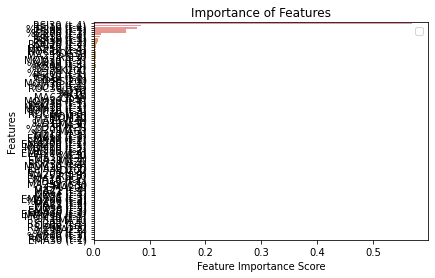

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Bar Graph
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Importance of Features")
plt.legend()
plt.show()

From the outputs, it can be stated that the five most important features to predict the direction of return are the Relative Strength Index (30, t-4), RSI (10, t-4), the Stochastic Oscillator %D (200, t-4), %D (200, t-3) and RSI (200, t-2).

These results are supported by the fact that these features sit very high at the top of the decision tree, which means they are have higher importance in determining the direction of return than the rest of the features.

# Question 14
### Which model was the best model? Which features (variables) is the best predictors?

To determine which was the best model, we must compare their accuracy scores.

The rbf Support Vector Machine Model had an accuracy of 69.31% in its predictions. This is acceptable but not very trustworthy to make decisions based solely in it. The poly Support Vector Machine Model had an accuracy of 76.37%. This is significantly better than the rbf model. Finally, the linear Support Vector Machine Model had an accuracy score of 69.31%, same as the rbf. If an investor were to use one of the SVM Models we would recomment that they use the poly SVM Model.

On the other hand, the Decision Tree Model had an accuracy score of 91.62%. This is a very good accuracy percentage. Investors can trust in this model to a high extent and make the right decision (buy or sell DTE stock).

The Random Forest Model accuracy value was 91.68%. This is also a good figure; it is better than that of the Decision Tree by 0.06 percentage points.

In light of this, we would recommend an investor looking for guidance in whether to sell or buy DTE stock to use the predictions given by the Random Forest Model rather than any of the SVM Models and the Decision Tree Model (although it is also very good), as it is more likely that it will give them the best recommendation.

As for the second question, we have observed in the Decision Tree and with the Importance of Features that the variables that make the best predictors are the Relative Strength Index (30, t-4), RSI (10, t-4), the Stochastic Oscillator %D (200, t-4), %D (200, t-3) and RSI (200, t-2). Investors should mainly be aware and look closely at these features of DTE stock to have a broad idea of the direction in which the prediction of the Random Forest Model will be headed.

# Question 15
### Write a summary of the process of creating a trading signal and how machine learning techniques can help us develop a profitable strategy.

To create a trading signal with value of 1 for buy (if the signal is that short term price will go up compared to long term) and 0 for sell (if the signal is that short term price will go down compared to long term) we start by loading the data of a selected stock. The key variable will be the close prices. It is good to make a visual interpretation of the data before manipulating it via graphs and descriptive statistics to know what we are working with and get a basic idea of how the stock behaves over time.

Next, we must prepare the data and create the signals. For this a short term moving average and long term moving average of the prices are created. When the short term moving average is greater than the long term moving average, we tell the machine to give this a signal of 1 (buy) and 0 when it is less (sell). We now have these signals created for each of the observations; but what would be really useful would be to be able to predict these signals for the future.

To predict, we now must proceed to build the dataset with the predictors that will give us the prediction of buying or selling. These predictors are (considering different amounts of lags) moving average, stochastic oscillators %K and %D, relative strength index, rate of change and momentum; all of which are calculated through our used software. Once again, it is a good idea to have a broad idea of how these predictors behave through visual aids such as histograms and the correlation heatmap.

Now this is when machine learning techniques really take on the biggest role. Having constructed our dataset that will be used for prediction, we separate our data into 2, being mindful in the code about the Date variable as we have time-series data and therefore, it cannot be split randomly for training and testing. 70% of the data goes towards training the machine on making predictions from analyzing data patterns and relationships, and the remaining 30% goes towards testing what the machine was able to learn about making predictions of our data. As theory states that stock prices are partially dependent on the same stock prices in the past, we must account for this autocorrelation by using the variable with lags. We then proceed to create predictive models and look for the one that makes these predictions with the higher accuracy. In this case we created a Support Vector Machine Model, a Decision Tree Model and a Random Forest Model but others such as Logistic and Linear Regression, Neural Networks Model, or Clustering Algorithms may also be put to the test. Confusion matrixes and accuracy tests are often performed to see how well the machine is at making predictions based on what it has learned. The one that throws the higher accuracy values is often considered the best model and can be used (if the user deems is worthy of trust) in real life to make investment decisions.

Machine learning today has come such a long way to the point that this is done in a matter of minutes running a few lines of code. Machine learning techniques such as the ones utilized in this project are very valuable to investors since they are able to provide tools that aid them in their daily decision-making process. In this case, the selected model is able to advise an investor with accuracy whether they should buy or sell DTE Energy Co.’s stock without them having to deeply analyze or make calculations by themselves. This saves investors’ time and effort and helps them to minimize their opportunity costs. Overall, this project has proven machine learning techniques to be an efficient method of creating profitable financial strategies.